In [1]:
import numpy as np
import torch
from scipy.spatial import KDTree
import matplotlib.pyplot as plt
import math
from math import pi
import pyvista as pv
from scipy import interpolate
import surface_normalize
from pyvista import examples

l:\program\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
etching = np.load('./Data/For_etching_transport_TS60_deposit_0618_linear_paper_NoDSMC2_empty2.npy')

In [4]:
indice = np.logical_and(etching != -10, etching != -50)
etching[indice] = 0

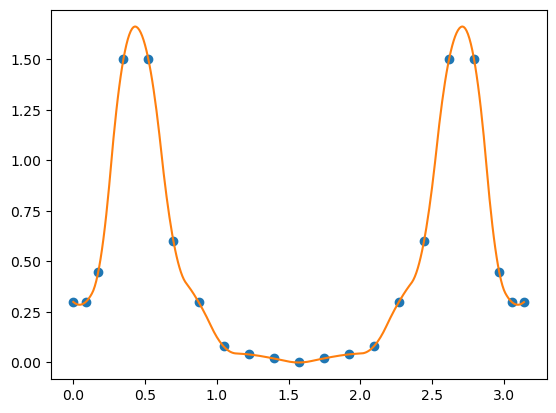

In [3]:
yield_hist = np.array([[0.3, 0.3, 0.45,  1.5,  1.5,  0.6, 0.3, 0.08, 0.04, 0.02,  0, \
                        0.02, 0.04, 0.08, 0.3, 0.6, 1.5, 1.5, 0.45, 0.3, 0.3], \
                        [  0,  5,   10,   20,   30,   40,   50,   60,   70,   80, 90, \
                         100, 110, 120, 130, 140, 150, 160, 170, 175, 180]])
yield_hist[1] *= np.pi/180
yield_func = interpolate.interp1d(yield_hist[1], yield_hist[0], kind='quadratic')

xnew = np.arange(0, np.pi, 0.01)
# xnew = np.array([])
ynew = yield_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(yield_hist[1], yield_hist[0], 'o', xnew, ynew, '-')
plt.show()

In [4]:
testpy = surface_normalize.surface_normal(center_with_direction=np.array([[50,50,10]]),range3D=np.array([[0, 100, 0, 100, 0, 150]]), InOrOut=[1],celllength=1e-9,  yield_hist=yield_hist)

In [7]:
getdata = testpy.get_pointcloud(etching[:50, :, :])

In [8]:
point_cloud = pv.PolyData(getdata[:, 3:])
vectors = getdata[:, :3]

point_cloud['vectors'] = vectors
arrows = point_cloud.glyph(
    orient='vectors',
    scale=1000,
    factor=2,
)

# Display the arrows
plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='maroon', point_size=5.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
# plotter.add_point_labels([point_cloud.center,], ['Center',],
#                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

Widget(value='<iframe src="http://localhost:58104/index.html?ui=P_0x229cd4aa4d0_1&reconnect=auto" class="pyvis…

In [13]:
getdata

array([[-3.44659995e-01, -6.42385897e-01,  6.84507010e-01,
         0.00000000e+00,  0.00000000e+00,  1.12000000e+02],
       [-3.76215071e-01, -6.69187645e-01,  6.40819878e-01,
         0.00000000e+00,  1.00000000e+00,  1.12000000e+02],
       [-7.39096847e-02, -7.64938246e-01,  6.39849074e-01,
         0.00000000e+00,  2.00000000e+00,  1.13000000e+02],
       ...,
       [-8.31223499e-02, -1.94027789e-01,  9.77468103e-01,
         4.20000000e+01,  1.97000000e+02,  1.18000000e+02],
       [ 6.34441316e-02, -1.92419890e-01,  9.79259633e-01,
         4.20000000e+01,  1.98000000e+02,  1.19000000e+02],
       [ 2.24986097e-02, -2.31830301e-01,  9.72496028e-01,
         4.20000000e+01,  1.99000000e+02,  1.19000000e+02]])

In [14]:
surface_tree = KDTree(getdata[:, 3:])
dd, ii = surface_tree.query(getdata[12200, 3:], k=18, workers=5)


knn_pts = getdata[:, 3:][ii]

In [15]:
print(knn_pts)

[[ 20. 183. 117.]
 [ 21. 183. 117.]
 [ 19. 183. 117.]
 [ 20. 184. 117.]
 [ 21. 184. 117.]
 [ 19. 182. 117.]
 [ 21. 182. 117.]
 [ 20. 182. 116.]
 [ 19. 184. 117.]
 [ 22. 183. 117.]
 [ 18. 183. 117.]
 [ 20. 185. 117.]
 [ 22. 182. 117.]
 [ 18. 184. 117.]
 [ 21. 185. 117.]
 [ 20. 181. 116.]
 [ 18. 182. 117.]
 [ 22. 184. 117.]]


In [25]:
choicePoint = np.logical_or(getdata[:, 5] < 100,  getdata[:, 5] > 110)
choicePoint |= np.logical_or(getdata[:, 3] < 20,  getdata[:, 3] > 30)
choicePoint |= np.logical_or(getdata[:, 4] < 50,  getdata[:, 4] > 80)

choicePoint_in = getdata[:, 3:][~choicePoint]

In [26]:
choicePoint_in.shape

(125, 3)

In [27]:
getdata.shape

(25173, 6)

In [32]:
surface_tree = KDTree(getdata[:, 3:])
dd, ii = surface_tree.query(choicePoint_in[100], k=18, workers=5)

knn_pts = getdata[:, 3:][ii]

point_cloud = pv.PolyData(getdata[:, 3:])
nighbhood = pv.PolyData(knn_pts)
center = pv.PolyData(choicePoint_in[100])
vectors = getdata[:, :3]

point_cloud['vectors'] = vectors
arrows = point_cloud.glyph(
    orient='vectors',
    scale=100000,
    factor=5,
)

# Display the arrowscyan

sphere = pv.Sphere(radius=3, center=choicePoint_in[100])
plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='cyan', point_size=5.0, render_points_as_spheres=True)
plotter.add_mesh(sphere, show_edges=True, opacity=0.1, color="w")
plotter.add_mesh(nighbhood, color='red', point_size=8.0, render_points_as_spheres=True)
plotter.add_mesh(center, color='yellow', point_size=10.0, render_points_as_spheres=True)
# plotter.add_mesh(arrows, color='lightblue')
# # plotter.add_point_labels([point_cloud.center,], ['Center',],
# #                          point_color='yellow', point_size=20)
# plotter.show_grid()
plotter.show()

Widget(value='<iframe src="http://localhost:65377/index.html?ui=P_0x14600cc78d0_9&reconnect=auto" class="pyvis…

In [39]:
point_cloud = pv.PolyData(getdata[:, 3:])
vectors = getdata[:, :3]

point_cloud['vectors'] = vectors
arrows = point_cloud.glyph(
    orient='vectors',
    scale=100000,
    factor=5,
)

# Display the arrowscyan

sphere = pv.Sphere(radius=4, center=(21, 75, 114.5))
plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='cyan', point_size=5.0, render_points_as_spheres=True)
plotter.add_mesh(sphere, show_edges=True, opacity=0.5, color="w")
# plotter.add_mesh(arrows, color='lightblue')
# # plotter.add_point_labels([point_cloud.center,], ['Center',],
# #                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

Widget(value='<iframe src="http://localhost:63139/index.html?ui=P_0x1c1c5d76e90_17&reconnect=auto" class="pyvi…

In [42]:
substrute = torch.Tensor(etching[:, :, :]==-10).to_sparse()
substrute = substrute.indices().numpy().T

trench = torch.Tensor(etching[:, :, :]==-50).to_sparse()
trench = trench.indices().numpy().T

# depomesh = pv.PolyData(etched)
# depomesh["radius"] = np.ones(etched.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

trenchmesh = pv.PolyData(trench)
trenchmesh["radius"] = np.ones(trench.shape[0])*0.5

# Progress bar is a new feature on master branch
# depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)
trenchglyphed = trenchmesh.glyph(scale="radius", geom=geom) # progress_bar=True)
sphere = pv.Sphere(radius=4, center=(21, 75, 114.5))
p = pv.Plotter()
p.add_mesh(sphere, show_edges=True, opacity=0.5, color="w")
# p.add_mesh(depoglyphed, color='pink')
p.add_mesh(subglyphed, color='cyan')
p.add_mesh(trenchglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show_grid()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
l:\program\Lib\site-packages\pyvista\core\filters\data_set.py:2320: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:63139/index.html?ui=P_0x1c1e1514110_19&reconnect=auto" class="pyvi…

In [ ]:
point_cloud = pv.PolyData(getdata[:, 3:])
vectors = getdata[:, :3]

point_cloud['vectors'] = vectors
arrows = point_cloud.glyph(
    orient='vectors',
    scale=100000,
    factor=5,
)

# Display the arrowscyan

sphere = pv.Sphere(radius=4, center=(21, 75, 114.5))
plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='cyan', point_size=5.0, render_points_as_spheres=True)
plotter.add_mesh(sphere, show_edges=True, opacity=0.5, color="w")
# plotter.add_mesh(arrows, color='lightblue')
# # plotter.add_point_labels([point_cloud.center,], ['Center',],
# #                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

In [21]:
film = np.zeros((100, 100, 100))

bottom = 20
film[:, :, :bottom] = 10 # bottom

filmSurface  = np.random.randn(100, 100)*2 + 10

for i in range(film.shape[0]):
    for j in range(film.shape[1]):
        film[i, j, :bottom+int(filmSurface[i, j])] = 10

In [22]:
substrute = torch.Tensor(film==10).to_sparse()
substrute = substrute.indices().numpy().T

geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(subglyphed, color='gray')
p.enable_eye_dome_lighting()
p.show()


l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
l:\program\Lib\site-packages\pyvista\core\filters\data_set.py:2320: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:63139/index.html?ui=P_0x1c1bbceea90_9&reconnect=auto" class="pyvis…

In [33]:
freq = [0.689, 0.562, 0.683]
noise = pv.perlin_noise(1, freq, (0, 0, 0))
sampled = pv.sample_function(noise, bounds=(-10, 10, -10, 10, -10, 10), dim=(500, 500, 1))

In [34]:
mesh = sampled.warp_by_scalar('scalars')
mesh = mesh.extract_surface()

# clean and smooth a little to reduce Perlin noise artifacts
mesh = mesh.smooth(n_iter=100, inplace=False, relaxation_factor=1)

# This makes the "water" level look flat.
z = mesh.points[:, 2]
diff = z.max() - z.min()

# water level at 70%  (change this to change the water level)
water_percent = 0.7
water_level = z.max() - water_percent * diff
mesh.points[z < water_level, 2] = water_level

In [ ]:
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

In [35]:
# make the water blue
rng = z.max() - z.min()
clim = (z.max() - rng * 1.65, z.max())

pl = pv.Plotter()
pl.add_mesh(
    mesh,
    scalars=z,
    cmap='gist_earth',
    n_colors=10,
    show_scalar_bar=False,
    smooth_shading=True,
    clim=clim,
)
pl.show()

Widget(value='<iframe src="http://localhost:63139/index.html?ui=P_0x1c1b0e2c9d0_13&reconnect=auto" class="pyvi…

In [ ]:
filmSample = np.a

surfaceSample = testpy.get_pointcloud(filmSample)

In [ ]:
point_cloud = pv.PolyData(surfaceSample[:, 3:])
vectors = surfaceSample[:, :3]

point_cloud['vectors'] = vectors
arrows = point_cloud.glyph(
    orient='vectors',
    scale=100000,
    factor=5,
)

# Display the arrowscyan

sphere = pv.Sphere(radius=10, center=(21, 75, 110))
plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='cyan', point_size=5.0, render_points_as_spheres=True)
plotter.add_mesh(sphere, show_edges=True, opacity=0.5, color="w")
# plotter.add_mesh(arrows, color='lightblue')
# # plotter.add_point_labels([point_cloud.center,], ['Center',],
# #                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()